In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Food_Production.csv')
df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [3]:
df.shape

(43, 23)

In [4]:
df_info= pd.DataFrame({"Dtype": df.dtypes, "Unique": df.nunique(), "Missing (%)": (df.isnull().sum()/df.shape[0])*100})
df_info

,Dtype,Unique,Missing (%)
Food product,object,43,0.000000
Land use change,float64,21,0.000000
Animal Feed,float64,10,0.000000
Farm,float64,24,0.000000
Processing,float64,10,0.000000
Transport,float64,8,0.000000
Packging,float64,10,0.000000
Retail,float64,4,0.000000
Total_emissions,float64,33,0.000000
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),float64,33,23.255814


# Total_emissions

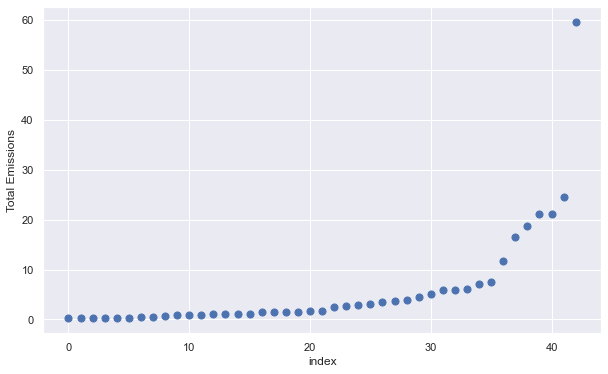

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(range(df.shape[0]), np.sort(df.Total_emissions.values), s= 50)
plt.xlabel('index', fontsize=12)
plt.ylabel('Total Emissions', fontsize=12)
plt.show()

# Land use per 1000kcal

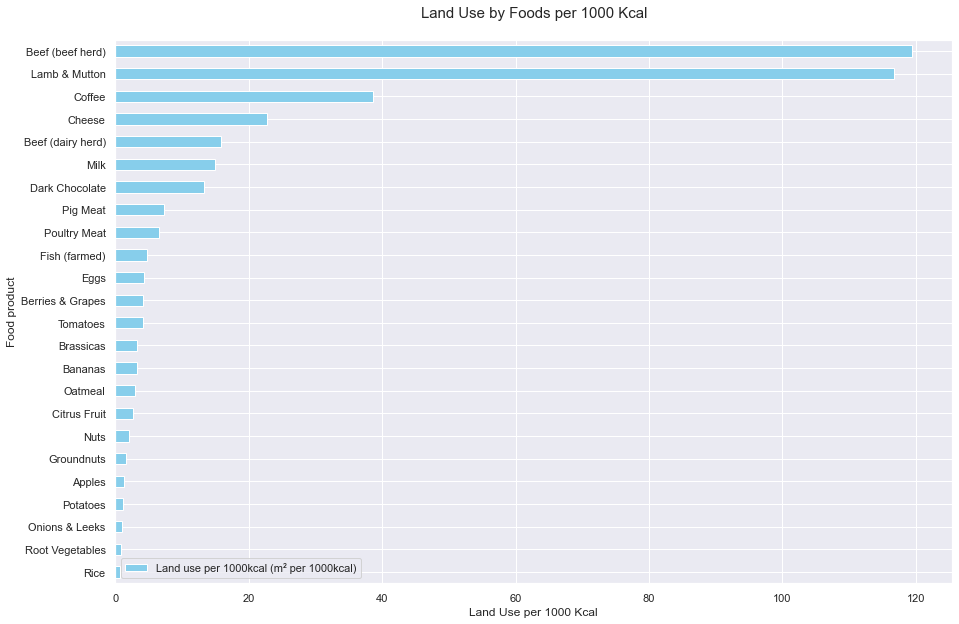

In [6]:
land_df= df.dropna().sort_values(by= 'Land use per 1000kcal (m² per 1000kcal)', ascending= True)[['Food product','Land use per 1000kcal (m² per 1000kcal)']]

fig, ax = plt.subplots(figsize=(15,10))
land_df.set_index('Food product', inplace=True)
land_df.plot(kind='barh', stacked=True, ax= ax, color= "skyblue")
plt.xlabel("Land Use per 1000 Kcal")
plt.title("Land Use by Foods per 1000 Kcal\n", size= 15)
plt.show()

# Land use per kilogram

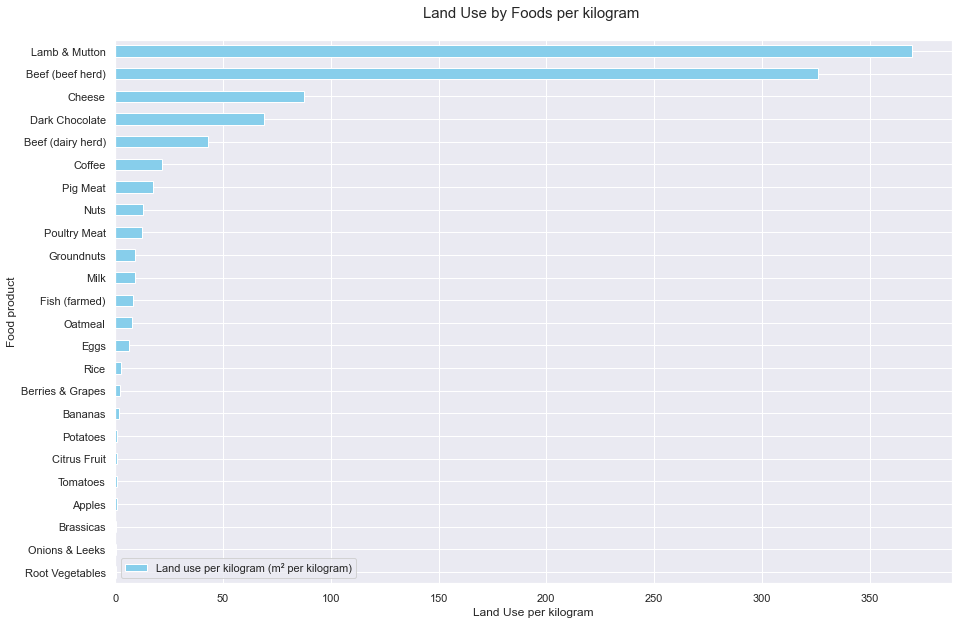

In [7]:
land_df= df.dropna().sort_values(by= 'Land use per kilogram (m² per kilogram)', ascending= True)[['Food product',
       'Land use per kilogram (m² per kilogram)']]

fig, ax = plt.subplots(figsize=(15,10))
land_df.set_index('Food product', inplace=True)
land_df.plot(kind='barh', stacked=True, ax= ax, color= "skyblue")
plt.xlabel("Land Use per kilogram")
plt.title("Land Use by Foods per kilogram \n", size= 15)
plt.show()

# Water Usage Per 1000kcal

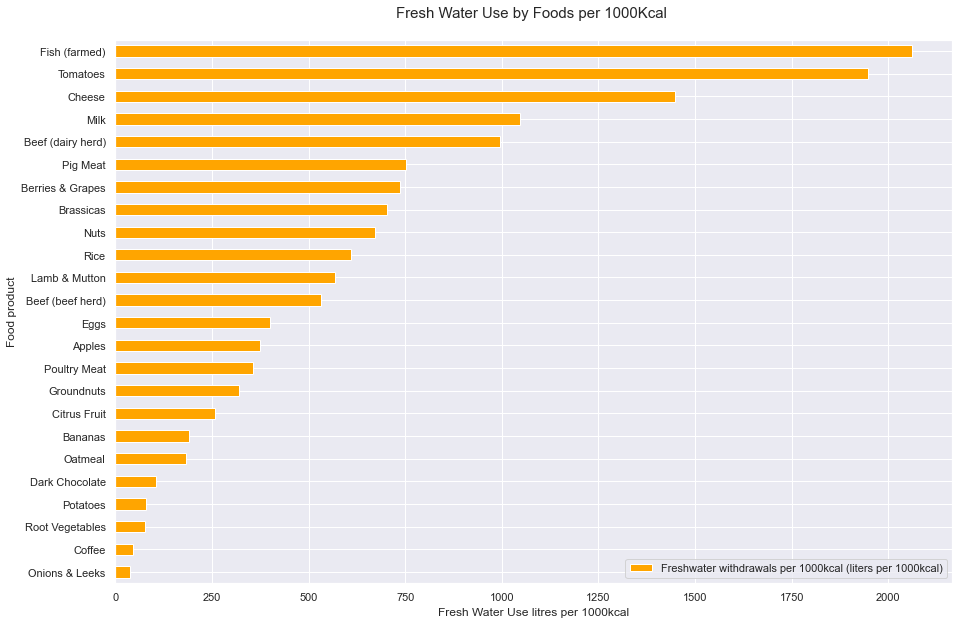

In [8]:
water_df= df.dropna().sort_values(by= 'Freshwater withdrawals per 1000kcal (liters per 1000kcal)', ascending= True)[['Food product',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)']]

fig, ax = plt.subplots(figsize=(15,10))
water_df.set_index('Food product', inplace=True)
water_df.plot(kind='barh', stacked=True, ax= ax, color= "orange")
plt.xlabel("Fresh Water Use litres per 1000kcal")
plt.title("Fresh Water Use by Foods per 1000Kcal \n", size= 15)
plt.show()

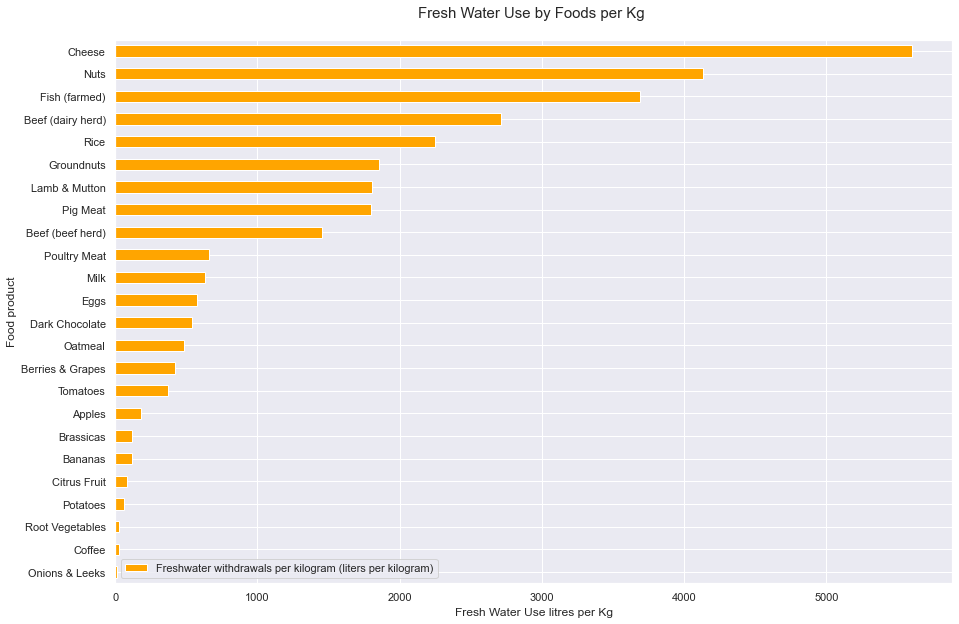

In [9]:
water_df= df.dropna().sort_values(by= 'Freshwater withdrawals per kilogram (liters per kilogram)', ascending= True)[['Food product',
       'Freshwater withdrawals per kilogram (liters per kilogram)']]

fig, ax = plt.subplots(figsize=(15,10))
water_df.set_index('Food product', inplace=True)
water_df.plot(kind='barh', stacked=True, ax= ax, color= "orange")
plt.xlabel("Fresh Water Use litres per Kg")
plt.title("Fresh Water Use by Foods per Kg \n", size= 15)
plt.show()

# Eutrophying emissions per 1000kcal

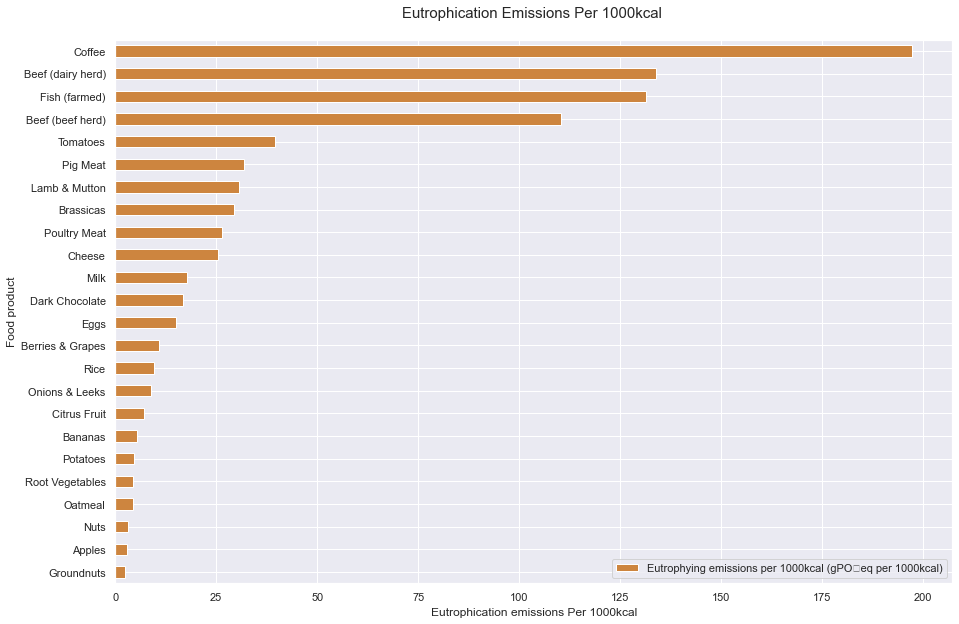

In [10]:
eutrophication_df= df.dropna().sort_values(by= 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)', ascending= True)[['Food product',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)']]

fig, ax = plt.subplots(figsize=(15,10))
eutrophication_df.set_index('Food product', inplace=True)
eutrophication_df.plot(kind='barh', stacked=True, ax= ax, color= "peru")
plt.xlabel('Eutrophication emissions Per 1000kcal')
plt.title('Eutrophication Emissions Per 1000kcal \n', size= 15)
plt.show()

# Eutrophying emissions per kilogram

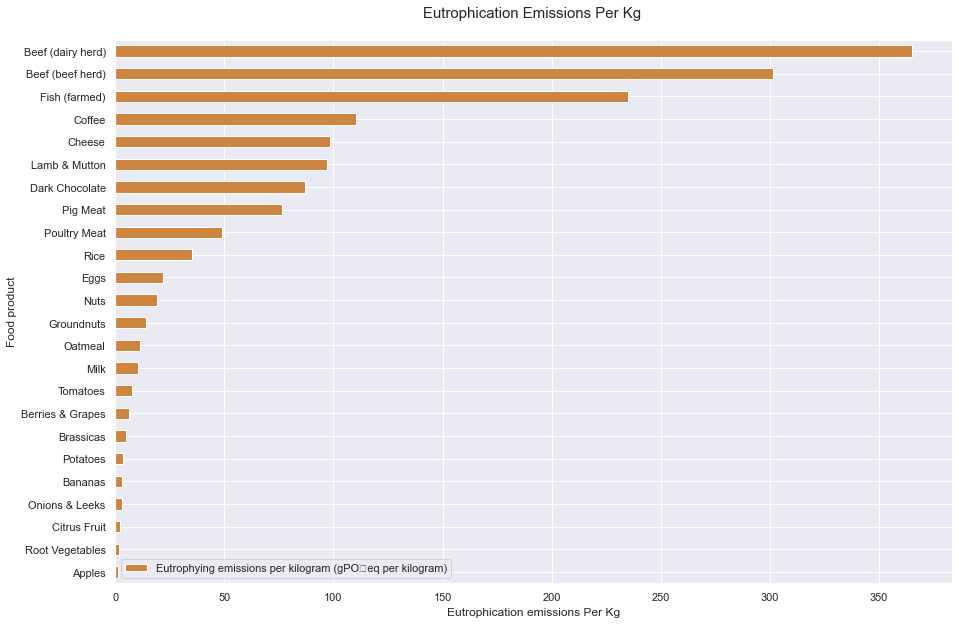

In [11]:
eutrophication_df= df.dropna().sort_values(by= 'Eutrophying emissions per kilogram (gPO₄eq per kilogram)', ascending= True)[['Food product',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)']]

fig, ax = plt.subplots(figsize=(15,10))
eutrophication_df.set_index('Food product', inplace=True)
eutrophication_df.plot(kind='barh', stacked=True, ax= ax, color= "peru")
plt.xlabel('Eutrophication emissions Per Kg')
plt.title('Eutrophication Emissions Per Kg \n', size= 15)
plt.show()